In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier, ExtraTreesClassifier, RandomForestClassifier
from sklearn.metrics import balanced_accuracy_score

from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import AdaBoostRegressor, ExtraTreesRegressor, RandomForestRegressor
from sklearn.metrics import mean_squared_error

In [2]:
data = pd.read_csv("debate_twitter_train.csv")

n_rows, n_features = data.shape

print("Number of rows = {}".format(n_rows))
print("Number of features = {}".format(n_features))

Number of rows = 70000
Number of features = 29


In [95]:
data.head()

,user_id,user_name,collectionDate,displayName,utcOffset,statusesCount,link,image,twitterTimeZone,summary,...,mcsize,influence,influence_percentile,tweetsCount,retweetsCount,bias_polarity,bias_engagement,sum_betweenness,botscore,is_bot
0,3.332211e+08,cwh7,2016-09-27 01:38:19,Christian Henderson,-10800.0,1871.0,http://www.twitter.com/cwh7,https://pbs.twimg.com/profile_images/726190367...,Atlantic Time (Canada),"''Speak up, speak often and don't worry about ...",...,NaN,1.000006,0.459540,0.0,1.0,NaN,NaN,0.0,0.20,0
1,6.787766e+07,sanjaysmehta,2016-09-27 02:38:02,sanjay mehta,19800.0,25954.0,http://www.twitter.com/sanjaysmehta,https://pbs.twimg.com/profile_images/261507198...,New Delhi,aam aadmi.\nhigh regard for plain common sense...,...,NaN,1.000000,0.317116,0.0,2.0,NaN,NaN,21830.0,0.32,0
2,7.343342e+17,temporalsin,2016-09-27 02:27:02,Алєѯандръ,7200.0,3106.0,http://www.twitter.com/temporalsin,https://pbs.twimg.com/profile_images/763687837...,Belgrade,Tessier-Ashpool. Evil Russian propagandist. P...,...,NaN,NaN,NaN,0.0,9.0,NaN,NaN,1980.0,0.31,0
3,3.289032e+09,cmurphey135,2016-09-27 01:39:52,Candler Murphey,NaN,1435.0,http://www.twitter.com/cmurphey135,https://pbs.twimg.com/profile_images/757261611...,NaN,NOHS golfer⏳18' 1.16.16. FTBT,...,NaN,1.000002,0.413393,0.0,1.0,NaN,NaN,2426464.0,0.15,0
4,7.827403e+08,BelknapJoanne,2016-09-27 02:30:01,Joanne Belknap,-21600.0,1751.0,http://www.twitter.com/BelknapJoanne,https://pbs.twimg.com/profile_images/697706273...,Mountain Time (US & Canada),"criminologist, Ethnic Studies Professor, socia...",...,NaN,1.001054,0.722689,0.0,3.0,NaN,NaN,0.0,0.39,0


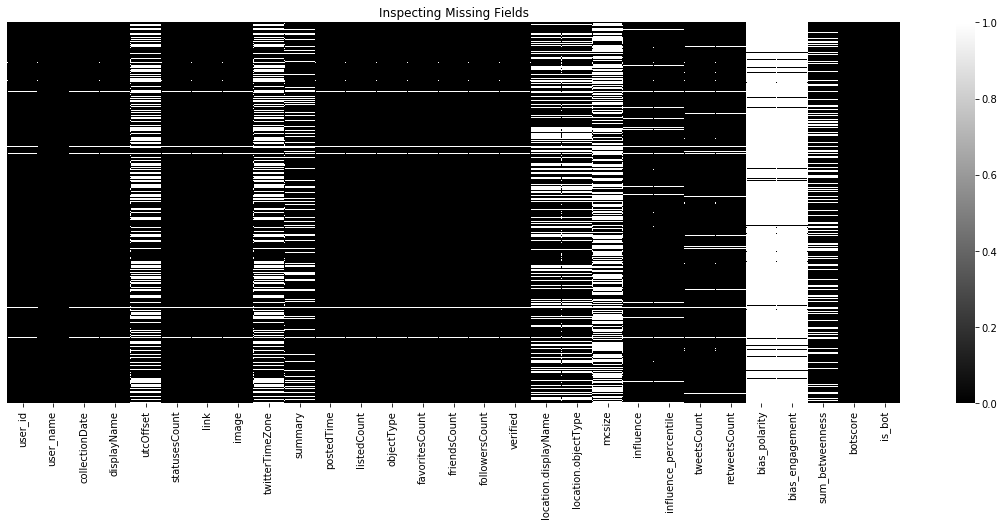

In [111]:
# Inspect missing values
plt.figure(figsize=(20,7))

sns.heatmap(data.isnull(), cmap='gray')
plt.title("Inspecting Missing Fields")
plt.yticks([])

plt.show()

In [97]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 29 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   user_id               68771 non-null  float64
 1   user_name             70000 non-null  object 
 2   collectionDate        68771 non-null  object 
 3   displayName           68770 non-null  object 
 4   utcOffset             43328 non-null  float64
 5   statusesCount         68771 non-null  float64
 6   link                  68771 non-null  object 
 7   image                 68771 non-null  object 
 8   twitterTimeZone       43328 non-null  object 
 9   summary               56598 non-null  object 
 10  postedTime            68771 non-null  object 
 11  listedCount           68771 non-null  float64
 12  objectType            68771 non-null  object 
 13  favoritesCount        68771 non-null  float64
 14  friendsCount          68771 non-null  float64
 15  followersCount     

In [98]:
for col in data.columns:
    print(col, len(data[col].unique())," : ")
    print(data[col].unique())
    print()

user_id 68772  : 
[3.33221088e+08 6.78776620e+07 7.34334239e+17 ... 1.88913489e+08
 2.43448102e+09 7.37153969e+17]

user_name 70000  : 
['cwh7' 'sanjaysmehta' 'temporalsin' ... 'Made513' 'groovyjbell'
 'TheMsWoodcock']

collectionDate 6846  : 
['2016-09-27 01:38:19' '2016-09-27 02:38:02' '2016-09-27 02:27:02' ...
 '2016-09-27 00:51:34' '2016-09-27 00:56:02' '2016-09-27 00:55:39']

displayName 62243  : 
['Christian Henderson' 'sanjay mehta' 'Алєѯандръ' ... 'Bryan Eck'
 'Matt Levine' 'MsWoodcock']

utcOffset 31  : 
[-10800.  19800.   7200.     nan -21600. -36000. -14400. -18000. -25200.
  10800.  28800.   3600.  12600. -28800.  36000.  -7200.  32400. -39600.
  -9000.  39600.  21600.  25200.  46800.  34200.  43200.  18000.  14400.
      0.  20700.  16200.  23400.]

statusesCount 24021  : 
[ 1871. 25954.  3106. ... 26905. 21616. 12126.]

link 68772  : 
['http://www.twitter.com/cwh7' 'http://www.twitter.com/sanjaysmehta'
 'http://www.twitter.com/temporalsin' ... 'http://www.twitter.com/Made

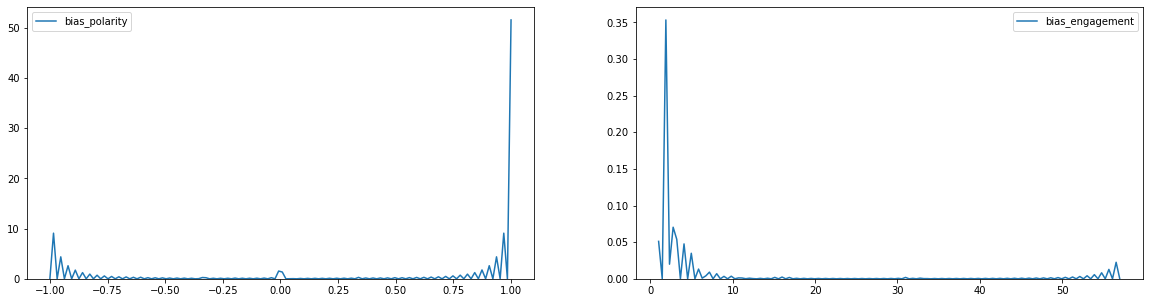

In [99]:
fig, ax = plt.subplots(1,2, figsize=(20,5))
sns.kdeplot(data.dropna(subset=['bias_polarity']).bias_polarity, ax=ax[0], bw=0)
sns.kdeplot(data.dropna(subset=['bias_engagement']).bias_engagement, ax=ax[1], bw=0)
plt.show()

In [100]:
data.loc[data.bias_engagement > 20]

,user_id,user_name,collectionDate,displayName,utcOffset,statusesCount,link,image,twitterTimeZone,summary,...,mcsize,influence,influence_percentile,tweetsCount,retweetsCount,bias_polarity,bias_engagement,sum_betweenness,botscore,is_bot
8874,4.491103e+08,amrightnow,2016-09-27 02:31:28,American Right Now,NaN,471752.0,http://www.twitter.com/amrightnow,https://pbs.twimg.com/profile_images/682881796...,NaN,Facebook: https://www.facebook.com/americanrig...,...,3.153846,2.816099,0.985641,39.0,0.0,1.000000,57.0,0.0,0.64,1
15904,1.498952e+07,bdomenech,2016-09-27 02:37:50,Ben Domenech,-14400.0,66702.0,http://www.twitter.com/bdomenech,https://pbs.twimg.com/profile_images/742734618...,Eastern Time (US & Canada),"Publisher @FDRLST, daily newsletter @TheTranso...",...,15.696970,5.954161,0.995677,33.0,1.0,1.000000,33.0,1.0,0.32,0
48355,7.202296e+17,SobienE,2016-09-27 01:52:32,ibeansob,NaN,302.0,http://www.twitter.com/SobienE,https://pbs.twimg.com/profile_images/771243905...,NaN,Just me...like it or leave!,...,NaN,1.001716,0.740164,0.0,97.0,0.870968,31.0,0.0,0.24,0


In [3]:
def build_regression_model(X, y):
    
    from sklearn.model_selection import train_test_split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    
    from sklearn.linear_model import LinearRegression, Lasso, Ridge
    from sklearn.tree import DecisionTreeRegressor
    from sklearn.neighbors import KNeighborsRegressor
    from sklearn.ensemble import AdaBoostRegressor, ExtraTreesRegressor, RandomForestRegressor
    from sklearn.metrics import mean_squared_error

    models = [LinearRegression(),
              Lasso(),
              Ridge(),
              DecisionTreeRegressor(),
              KNeighborsRegressor(), 
              AdaBoostRegressor(), 
              ExtraTreesRegressor(), 
              RandomForestRegressor()]

    labels = ["LinearRegression",
              "Lasso",
              "Ridge",
              "DecisionTreeRegressor",
              "KNeighborsRegressor", 
              "AdaBoostRegressor", 
              "ExtraTreesRegressor", 
              "RandomForestRegressor"]
    
    eval_df = pd.DataFrame()
    for label, model in zip(labels, models):

#         print(label)
        model.fit(X_train, y_train)

        test_pred = model.predict(X_test)
        
        model_results = pd.DataFrame({'model' : label,
                                      'RMSE(Test)' : np.sqrt(mean_squared_error(y_test, test_pred))},
                                       index=[0])                              

        eval_df = pd.concat((eval_df, model_results), axis=0)

    return eval_df.sort_values(by='RMSE(Test)').reset_index(drop=True)

In [4]:
def build_classification_model(X, y):
    
    from sklearn.model_selection import train_test_split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    
    from sklearn.linear_model import LogisticRegression, RidgeClassifier
    from sklearn.tree import DecisionTreeClassifier
    from sklearn.neighbors import KNeighborsClassifier
    from sklearn.ensemble import AdaBoostClassifier, ExtraTreesClassifier, RandomForestClassifier
    from sklearn.metrics import balanced_accuracy_score

    models = [LogisticRegression(max_iter=10000),
              RidgeClassifier(),
              DecisionTreeClassifier(),
              KNeighborsClassifier(), 
              AdaBoostClassifier(), 
              ExtraTreesClassifier(), 
              RandomForestClassifier()]

    labels = ["LogisticRegression",
              "Ridge",
              "DecisionTreeClassifier",
              "KNeighborsClassifier", 
              "AdaBoostClassifier", 
              "ExtraTreesClassifier", 
              "RandomForestClassifier"]
    
    eval_df = pd.DataFrame()
    for label, model in zip(labels, models):

#         print(label)
        model.fit(X_train, y_train)

        test_pred = model.predict(X_test)

        model_results = pd.DataFrame({'model' : label,
                                      'Balanced Accuracy (Test)' : balanced_accuracy_score(y_test, test_pred)},
                                       index=[0])                              

        eval_df = pd.concat((eval_df, model_results), axis=0)

    return eval_df.sort_values(by='Balanced Accuracy (Test)', ascending=False).reset_index(drop=True)

#### Attempt 1.
- Only numerical columns
- Drop all NaN values
- Standard Scaling

In [103]:
# Data Preparation
df = data.select_dtypes('number').dropna()

X = df.drop(['botscore', 'is_bot'], axis=1)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

y_reg = df.botscore
y_clf = df.is_bot

In [104]:
build_regression_model(X, y_reg)

,model,RMSE(Test)
0,RandomForestRegressor,0.095438
1,ExtraTreesRegressor,0.099327
2,AdaBoostRegressor,0.101348
3,KNeighborsRegressor,0.124570
4,Lasso,0.124737
5,DecisionTreeRegressor,0.131013
6,Ridge,0.342736
7,LinearRegression,0.396683


In [105]:
build_classification_model(X, y_clf)

,model,Balanced Accuracy (Test)
0,LogisticRegression,0.590909
1,Ridge,0.590909
2,DecisionTreeClassifier,0.584580
3,KNeighborsClassifier,0.545455
4,ExtraTreesClassifier,0.545455
5,RandomForestClassifier,0.500000
6,AdaBoostClassifier,0.487342


#### Attempt 2
- Only numerical columns
- Impute all NaN values with mean
- Standard Scaling

In [106]:
# Data Preparation
df = data.select_dtypes('number')

X = df.drop(['botscore', 'is_bot'], axis=1)

from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean')
X = imputer.fit_transform(X)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

y_reg = df.botscore
y_clf = df.is_bot

In [107]:
build_regression_model(X, y_reg)

,model,RMSE(Test)
0,RandomForestRegressor,0.093882
1,ExtraTreesRegressor,0.094713
2,KNeighborsRegressor,0.109088
3,LinearRegression,0.116236
4,Ridge,0.116236
5,Lasso,0.120058
6,DecisionTreeRegressor,0.133135
7,AdaBoostRegressor,0.153509


In [108]:
build_classification_model(X, y_clf)

,model,Balanced Accuracy (Test)
0,DecisionTreeClassifier,0.626144
1,AdaBoostClassifier,0.589034
2,RandomForestClassifier,0.586568
3,ExtraTreesClassifier,0.568599
4,KNeighborsClassifier,0.563265
5,LogisticRegression,0.521068
6,Ridge,0.502530


#### Attempt 3
- Only numerical columns
- Impute all NaN values with median

In [109]:
# Data Preparation
df = data.select_dtypes('number')

X = df.drop(['botscore', 'is_bot'], axis=1)

from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='median')
X = imputer.fit_transform(X)

y_reg = df.botscore
y_clf = df.is_bot

In [110]:
build_regression_model(X, y_reg)

C:\Users\Pandey\Anaconda3\envs\tf\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=1.03585e-36): result may not be accurate.
  overwrite_a=True).T


,model,RMSE(Test)
0,RandomForestRegressor,0.091629
1,ExtraTreesRegressor,0.092853
2,LinearRegression,0.116308
3,Ridge,0.116416
4,Lasso,0.117230
5,KNeighborsRegressor,0.124868
6,DecisionTreeRegressor,0.130925
7,AdaBoostRegressor,0.147399


In [111]:
build_classification_model(X, y_clf)

C:\Users\Pandey\Anaconda3\envs\tf\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\Pandey\Anaconda3\envs\tf\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=1.03585e-36): result may not be accurate.
  overwrite_a=True).T


,model,Balanced Accuracy (Test)
0,DecisionTreeClassifier,0.644958
1,RandomForestClassifier,0.593885
2,AdaBoostClassifier,0.590398
3,ExtraTreesClassifier,0.562672
4,KNeighborsClassifier,0.519716
5,Ridge,0.502530
6,LogisticRegression,0.500000


In [133]:
# Try attempt 3 for regression

df = data.select_dtypes('number')

X = df.drop(['botscore', 'is_bot'], axis=1)

from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='median')
X = imputer.fit_transform(X)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

y_reg = df.botscore

from sklearn.model_selection import cross_validate
from sklearn.linear_model import LinearRegression

# model = RandomForestRegressor()
# model_cv = cross_validate(model, X, y_reg, cv=5, scoring='neg_root_mean_squared_error')

# model_cv

In [5]:
def plot_cv_reg_scores(model_cv, name):
    plt.bar(np.arange(5), (- model_cv['test_score']))
    plt.ylim([0.0890, 0.1218])
    plt.title(name)
    plt.show()
    
def plot_cv_clf_scores(model_cv, name):
    plt.bar(np.arange(5), (model_cv['test_score']))
    plt.ylim([0.514, 0.840])
    plt.title(name)
    plt.show()

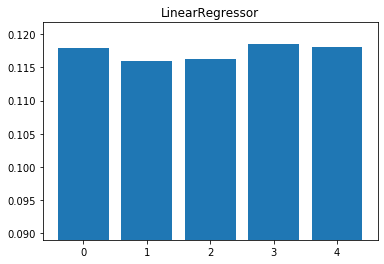

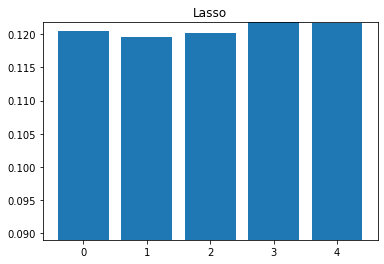

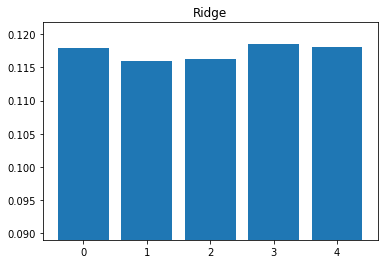

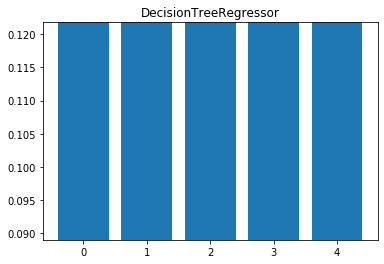

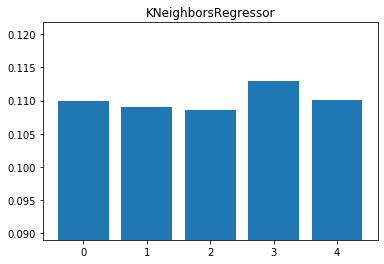

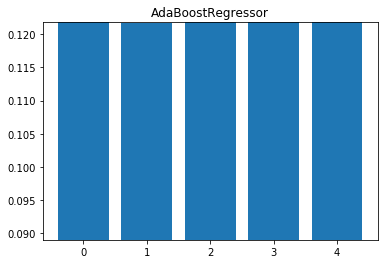

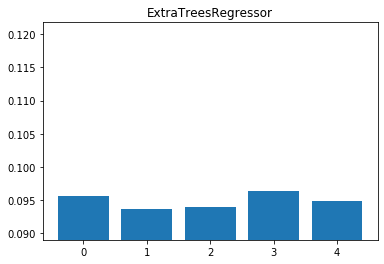

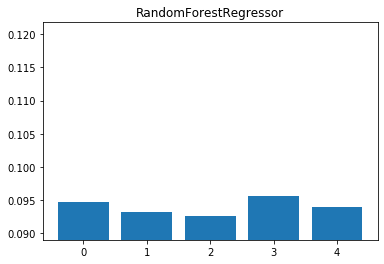

In [135]:
models = [LinearRegression(),
          Lasso(),
          Ridge(),
          DecisionTreeRegressor(),
          KNeighborsRegressor(), 
          AdaBoostRegressor(), 
          ExtraTreesRegressor(), 
          RandomForestRegressor()]

labels = ["LinearRegressor",
          "Lasso",
          "Ridge",
          "DecisionTreeRegressor",
          "KNeighborsRegressor", 
          "AdaBoostRegressor", 
          "ExtraTreesRegressor", 
          "RandomForestRegressor"]

for label, model in zip(labels, models):
    model_cv = cross_validate(model, X, y_reg, cv=5, scoring='neg_root_mean_squared_error')
    plot_cv_reg_scores(model_cv, label)

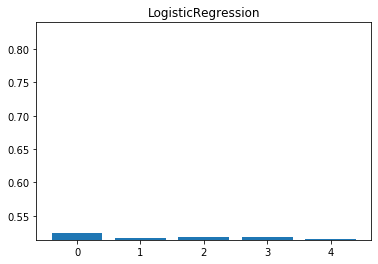

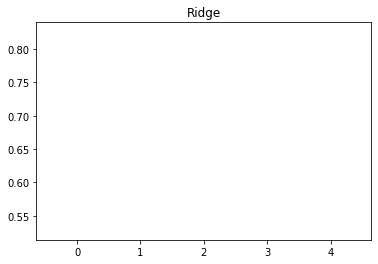

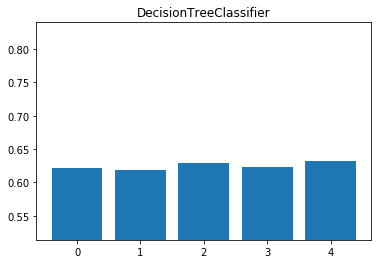

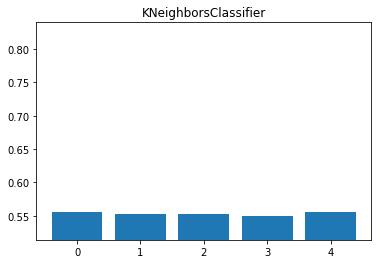

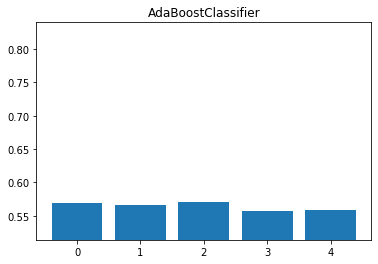

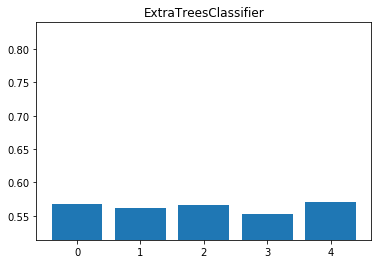

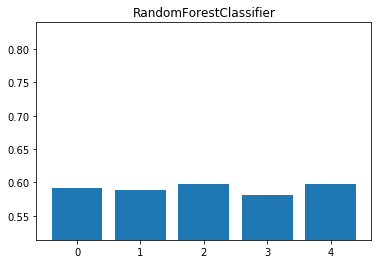

In [144]:
models = [LogisticRegression(max_iter=10000),
          RidgeClassifier(),
          DecisionTreeClassifier(),
          KNeighborsClassifier(), 
          AdaBoostClassifier(), 
          ExtraTreesClassifier(), 
          RandomForestClassifier()]

labels = ["LogisticRegression",
          "Ridge",
          "DecisionTreeClassifier",
          "KNeighborsClassifier", 
          "AdaBoostClassifier", 
          "ExtraTreesClassifier", 
          "RandomForestClassifier"]

for label, model in zip(labels, models):
    model_cv = cross_validate(model, X, y_clf, cv=5, scoring='balanced_accuracy')
    plot_cv_clf_scores(model_cv, label)

#### Atempt 4
- Strategy 3 + Target Encoding

0    Eastern Time (US & Canada)
dtype: object

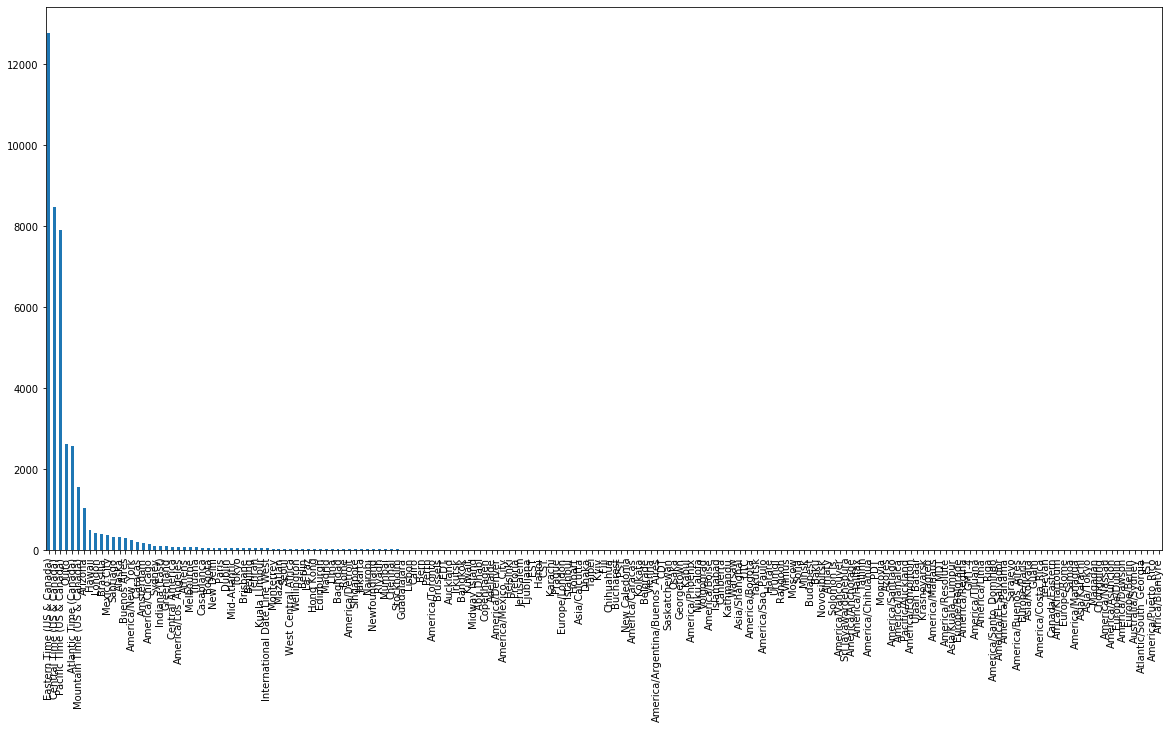

In [14]:
plt.figure(figsize=(20,10))
data.twitterTimeZone.value_counts().plot(kind='bar')
data.twitterTimeZone.mode()

In [106]:
df = data.select_dtypes('number')
df = pd.concat((df, data.twitterTimeZone), axis=1)

# Fill time zone randomly from most frequesnt ones
tz_na = data.twitterTimeZone.isnull().sum()
time_zone_data = data.twitterTimeZone.value_counts()[data.twitterTimeZone.value_counts() > 500].index.values
tz_impute_data = np.random.choice(time_zone_data, tz_na)
df.loc[data.twitterTimeZone.isnull(), 'twitterTimeZone'] = tz_impute_data

X = df.drop(['botscore', 'is_bot', 'user_id'], axis=1)
y_reg = df.botscore
y_clf = df.is_bot

# Target Encode Time Zone Data
from category_encoders import TargetEncoder
encoder = TargetEncoder()
tz_data = encoder.fit_transform(X.twitterTimeZone, y_clf)
X.loc[:, 'twitterTimeZone'] = tz_data

from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='median')
X = imputer.fit_transform(X)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

from sklearn.model_selection import cross_validate
from sklearn.linear_model import LinearRegression

In [109]:
build_classification_model(X, y_clf)

,model,Balanced Accuracy (Test)
0,DecisionTreeClassifier,0.628178
1,AdaBoostClassifier,0.591713
2,RandomForestClassifier,0.589965
3,ExtraTreesClassifier,0.552516
4,KNeighborsClassifier,0.548508
5,LogisticRegression,0.522011
6,Ridge,0.502530


In [110]:
build_regression_model(X, y_reg)

,model,RMSE(Test)
0,RandomForestRegressor,0.093897
1,ExtraTreesRegressor,0.094762
2,KNeighborsRegressor,0.111948
3,LinearRegression,0.117428
4,Ridge,0.117429
5,Lasso,0.120058
6,DecisionTreeRegressor,0.132822
7,AdaBoostRegressor,0.143160
